# Introduction

#### Beginning this project, we sought to discover the relationship between offensive MLB statistics and their contributions to wins.#
#### We sourced the statistics from baseballreference.com, and used data from the 2017 MLB season.
#### After running a correlation matrix, we sorted through the data and decided which data to keep, and which to remove from our analysis.
#### Through this process, we discovered some interesting relationships, and removed data which were either insignificant, or simply not applicable (such as RBI's)
#### Since using RBI's would almost be cheating, we removed that statistic, along with other, unimportant stats such as sacrifice flys, sacrifice hits, stolen bases, and caught stealing.


# From Wins to Runs

##### While continuing to search for the best way to approach this problem, we discovered that a major flaw was in our design. We were trying to predict Wins using only offensive statistics.  This lead us to change our approach, and try to predict the total Runs a team would produce using the statistics.  We used Machine Learning, training with our important offensive statistics to successfully predict total Runs.

In [27]:
import csv
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn import linear_model
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn import neighbors
%matplotlib notebook
from sklearn.model_selection import train_test_split

#load the dataset
AH_data=pd.read_csv("2017.csv")
data_clean=AH_data.dropna()

In [3]:
#cleaning the data
print(data_clean.dtypes)
data_clean.describe()

#using describe function to get a good overview of the data

Tm       object
R         int64
H         int64
2B        int64
3B        int64
HR        int64
RBI       int64
SB        int64
CS        int64
BB        int64
SO        int64
BA      float64
OBP     float64
SLG     float64
TB        int64
GDP       int64
HBP       int64
SH        int64
SF        int64
LOB       int64
BB%      object
SO%      object
WINS      int64
dtype: object


,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,TB,GDP,HBP,SH,SF,LOB,WINS
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,752.733333,1407.166667,279.900000,26.500000,203.500000,718.60000,84.233333,31.133333,527.633333,1336.800000,0.254900,0.324333,0.42590,2350.566667,126.800000,58.766667,30.833333,38.933333,1098.066667,81.000000
std,65.195691,70.040916,28.037352,8.661249,27.680131,63.07937,23.869882,7.006073,65.530453,122.869822,0.010159,0.011034,0.02065,125.362284,14.278993,14.194908,15.874689,8.300118,43.849219,11.531067
min,604.000000,1251.000000,226.000000,5.000000,128.000000,576.00000,32.000000,13.000000,390.000000,1087.000000,0.234000,0.299000,0.38000,2105.000000,99.000000,31.000000,9.000000,26.000000,1005.000000,64.000000
25%,707.000000,1351.000000,261.500000,20.250000,187.500000,672.75000,65.500000,28.000000,488.750000,1234.750000,0.249000,0.315500,0.41325,2303.500000,116.500000,50.000000,17.000000,33.500000,1076.000000,72.750000
50%,746.500000,1403.500000,282.500000,28.000000,209.000000,713.50000,88.000000,31.000000,535.500000,1335.500000,0.255500,0.324500,0.42950,2353.000000,126.500000,54.500000,29.000000,37.500000,1100.000000,79.000000
75%,808.750000,1458.000000,292.250000,31.750000,223.750000,771.00000,97.250000,34.000000,569.500000,1411.000000,0.260000,0.333500,0.43675,2411.500000,137.750000,69.250000,42.750000,43.500000,1129.750000,90.000000
max,896.000000,1581.000000,346.000000,39.000000,241.000000,854.00000,136.000000,44.000000,649.000000,1571.000000,0.282000,0.346000,0.47800,2681.000000,160.000000,88.000000,62.000000,61.000000,1184.000000,104.000000


In [4]:
data_clean

#printing the data

,Tm,R,H,2B,3B,HR,RBI,SB,CS,BB,...,SLG,TB,GDP,HBP,SH,SF,LOB,BB%,SO%,WINS
0,ARI,812,1405,314,39,220,776,103,30,578,...,0.445,2457,106,54,39,27,1118,9.30%,23.40%,93
1,ATL,732,1467,289,26,165,706,77,31,474,...,0.412,2303,137,66,59,32,1127,7.60%,19.10%,72
2,BAL,743,1469,269,12,232,713,32,13,392,...,0.435,2458,138,50,10,37,1041,6.40%,23.00%,75
3,BOS,785,1461,302,19,168,735,106,31,571,...,0.407,2305,141,53,9,36,1134,9.00%,19.30%,93
4,CHC,822,1402,274,29,223,785,62,31,622,...,0.437,2403,134,82,48,32,1147,9.90%,22.30%,92
5,CHW,706,1412,256,37,186,670,71,31,401,...,0.417,2300,124,76,35,33,1055,6.60%,23.10%,67
6,CIN,753,1390,249,38,219,715,120,39,565,...,0.433,2372,116,72,50,42,1135,9.10%,21.40%,68
7,CLE,818,1449,333,29,212,780,88,23,604,...,0.449,2476,125,50,23,45,1158,9.70%,18.50%,102
8,COL,824,1510,293,38,192,793,59,34,519,...,0.444,2455,143,44,62,41,1088,8.40%,22.70%,87
9,DET,735,1435,289,35,187,699,65,34,503,...,0.424,2355,128,52,11,27,1104,8.20%,21.40%,64


# Trying to predict runs versus wins

In [5]:
target_Wins = data_clean.WINS
features_Runs = ['R']
X_Runs = data_clean[features_Runs]
y_Wins = target_Wins
lm = linear_model.LinearRegression()
model = lm.fit(X_Runs,y_Wins)
y_Wins_predict = lm.predict(X_Runs)
lm.score(X_Runs, y_Wins)

0.52256415241691878

We created a simple linear regression model to see how well team runs predict team wins. We chose a linear regression model because Runs and Wins have a strong positive linear correlation. The R-squared value for our model is approximently .523. The variation in runs scored explain about fifty-two percent of the variation in team wins. 

<IPython.core.display.Javascript object>


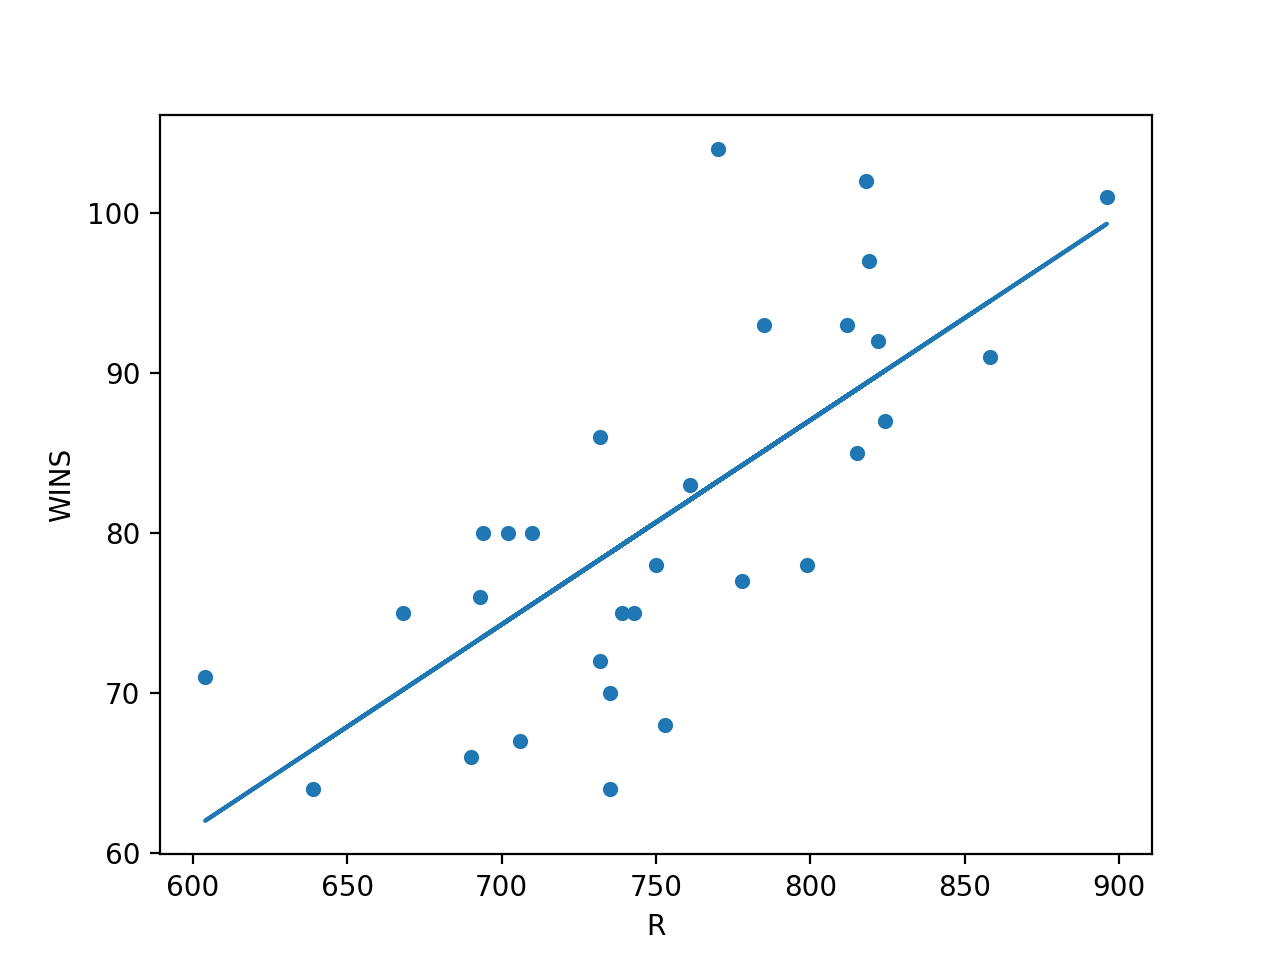

In [6]:
data_clean.plot.scatter('R', 'WINS')
plt.plot(X_Runs, y_Wins_predict)

#plotting runs versus wins
#with linear regression model

# Initial thoughts: Statistics we thought would be undervalued but weren't

### Sacrifice flies and sacrifice bunts:
We thought these would be important because teams playing small ball might be gaining a strategic advantage over others, but it turns out it's not very correlated

<IPython.core.display.Javascript object>


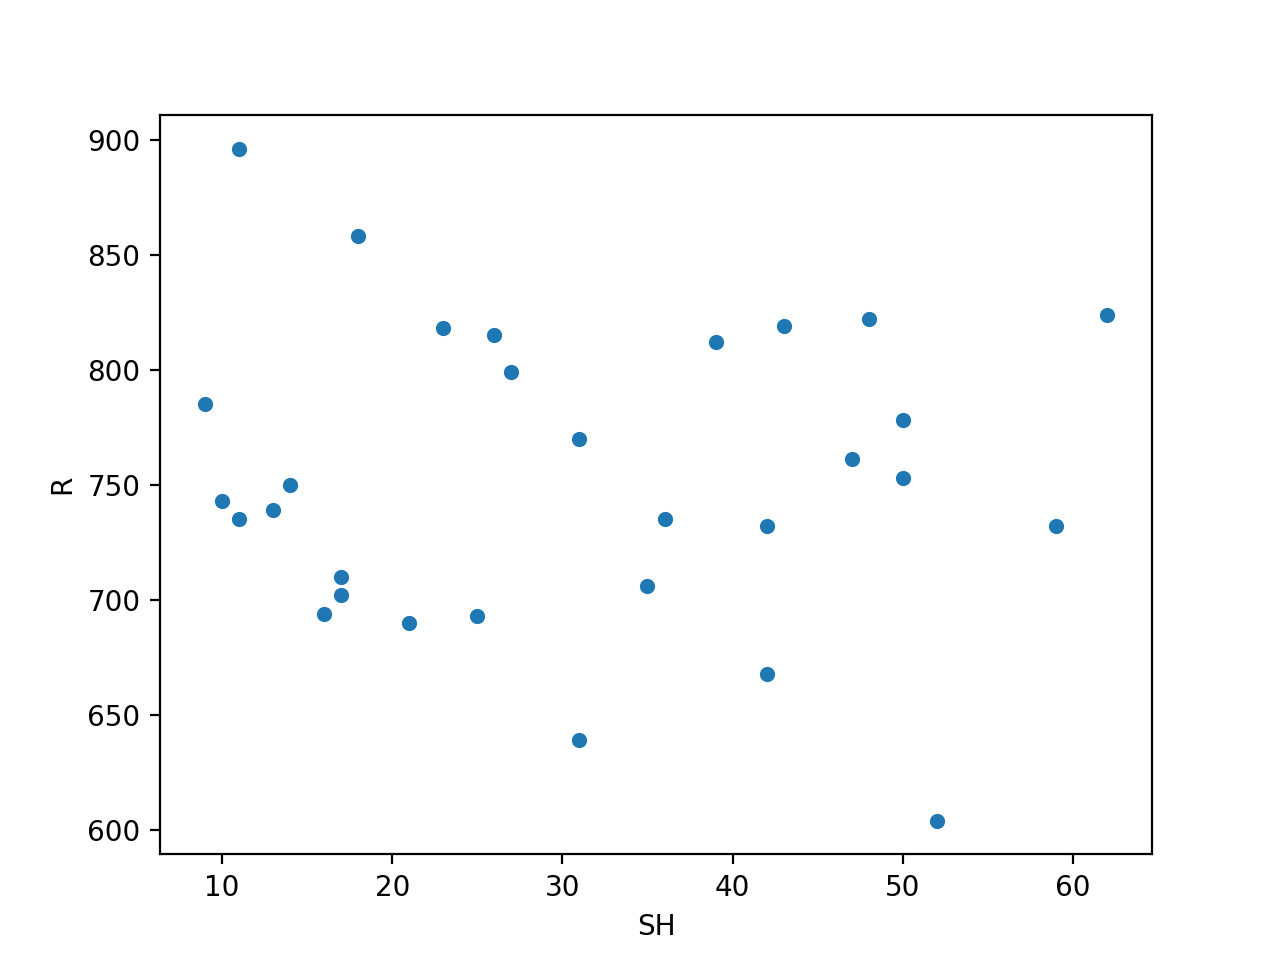

In [7]:
data_clean.plot.scatter('SH', 'R')

#plotting home runs versus wins

In [ ]:
data_clean.plot.scatter('SF', 'R')

#plotting hits versus wins

### Baserunning: Stolen Bases and Caught Stealing
We thought that baserunning would be undervalued since it isn't talked about as much and since stealing bases can put a team in a lot better position to score a run.

<IPython.core.display.Javascript object>


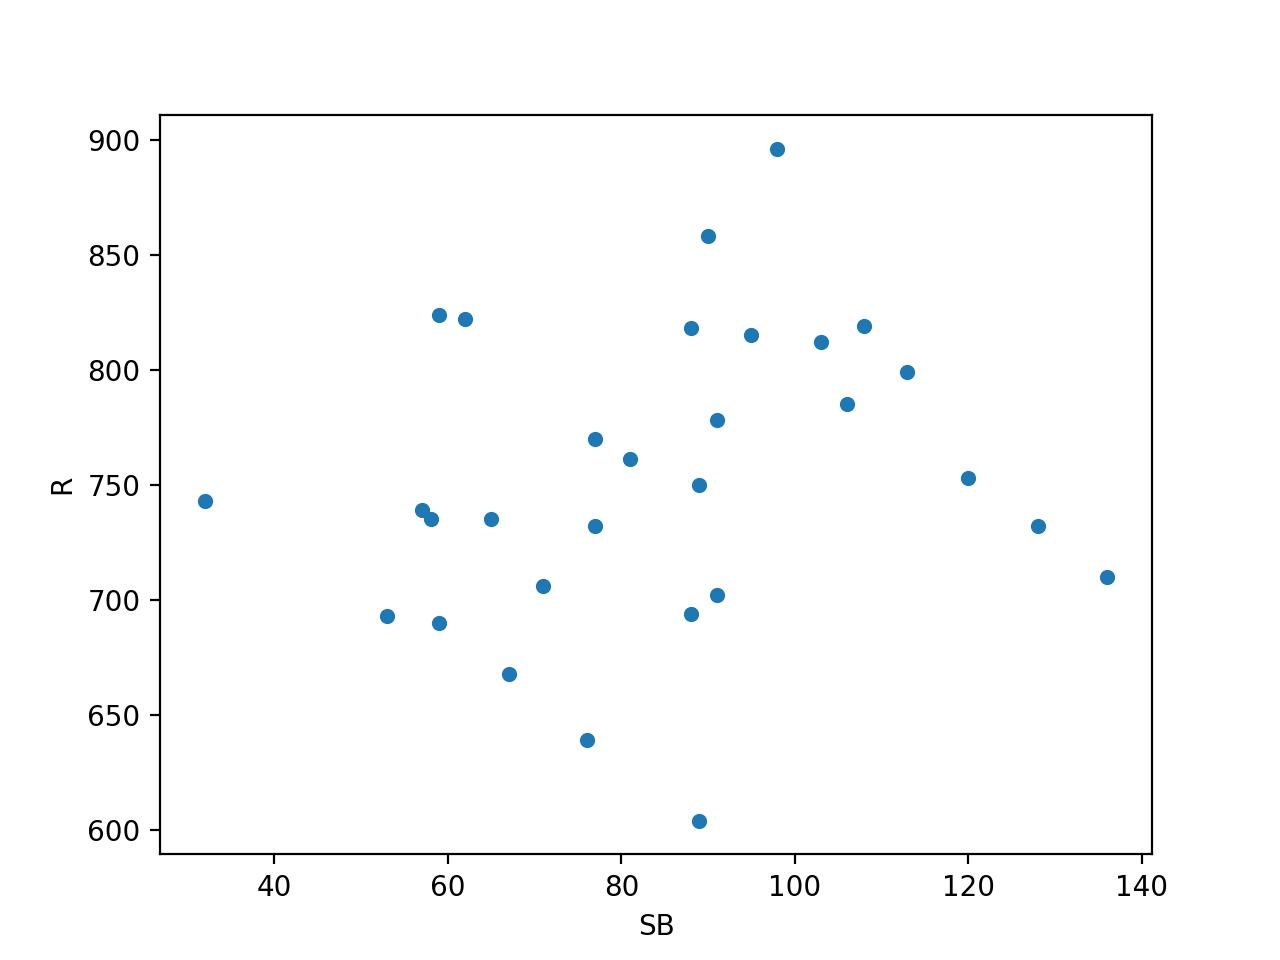

In [8]:
data_clean.plot.scatter('SB', 'R')

In [ ]:
data_clean.plot.scatter('CS', 'R')

# Obvious correlations but can't be used: RBIs
RBIs might be important for individual players, but as a team, you can't use them because almost every run comes with an RBI. The only time a run happens without an RBI is when there's an error on the other team or a player grounds into a double play.

<IPython.core.display.Javascript object>


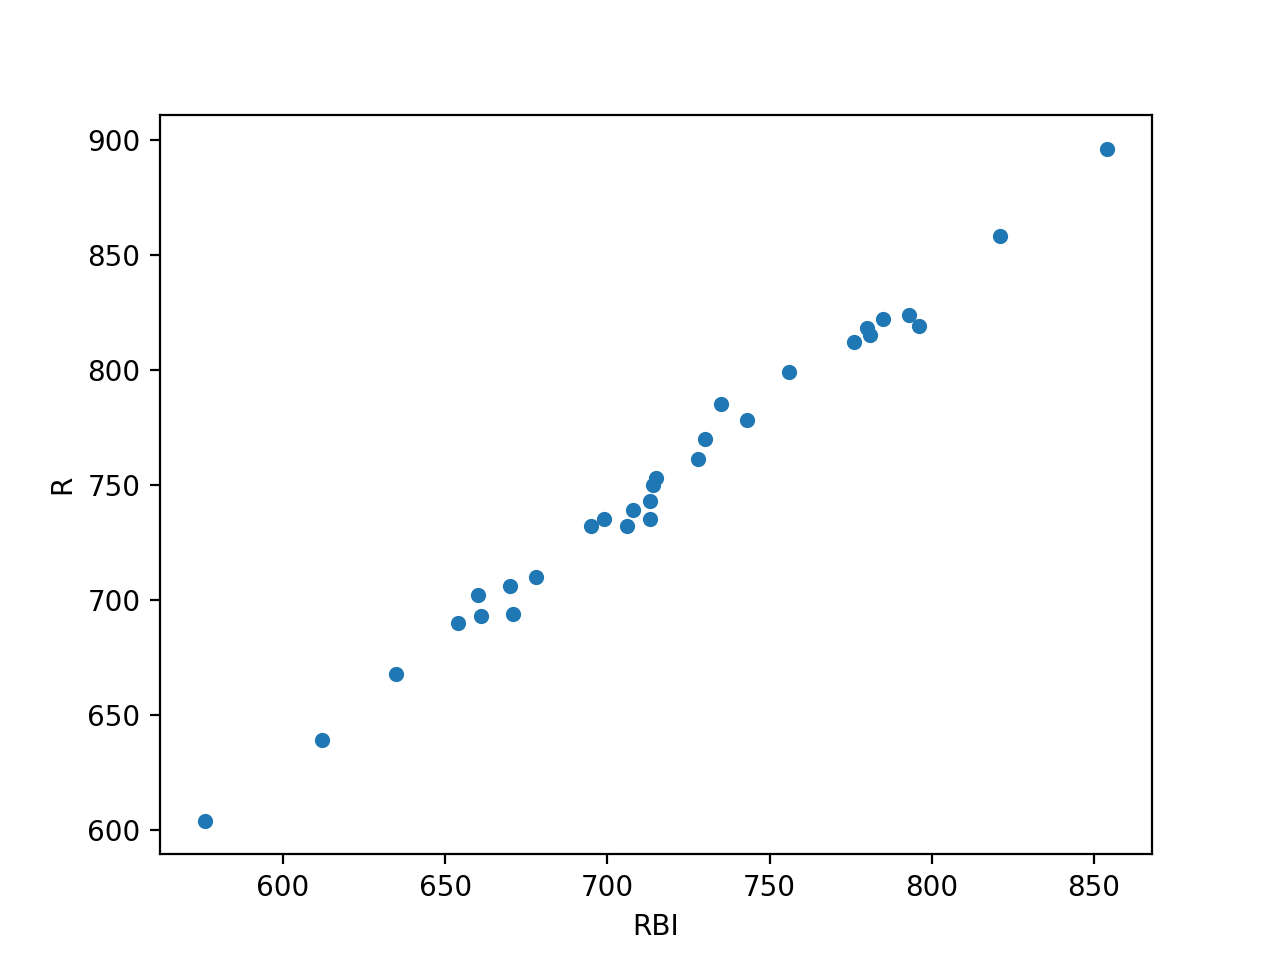

In [9]:
data_clean.plot.scatter('RBI', 'R')

# Traditional Statistics

### Batting average: Percentage of time a player gets a hit as opposed to getting out
We know that batting average is important, but as the intital wave of Sabermetrics tells us, hits aren't everything -- there are other ways to get on base and not all hits are equal. We will still see distinct correlation.

<IPython.core.display.Javascript object>


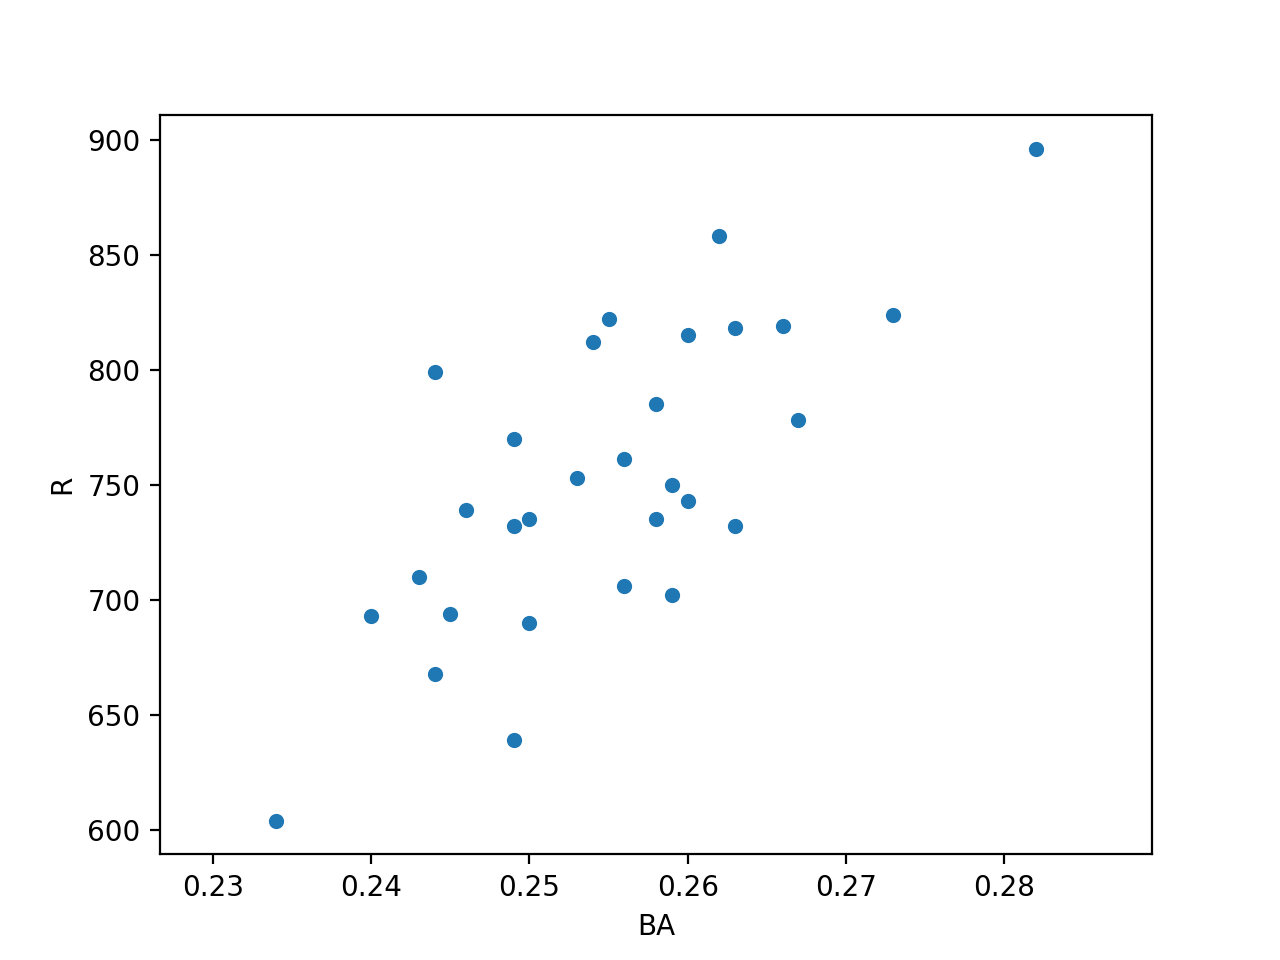

In [10]:
data_clean.plot.scatter('BA', 'R')

### Strikeouts: Outs where the ball doesn't get put in play
If a player strikes out, they are generally unable to move over a runner, whereas if a player grounds out or flies out, they may be able to be productive and advance a runner.

<IPython.core.display.Javascript object>


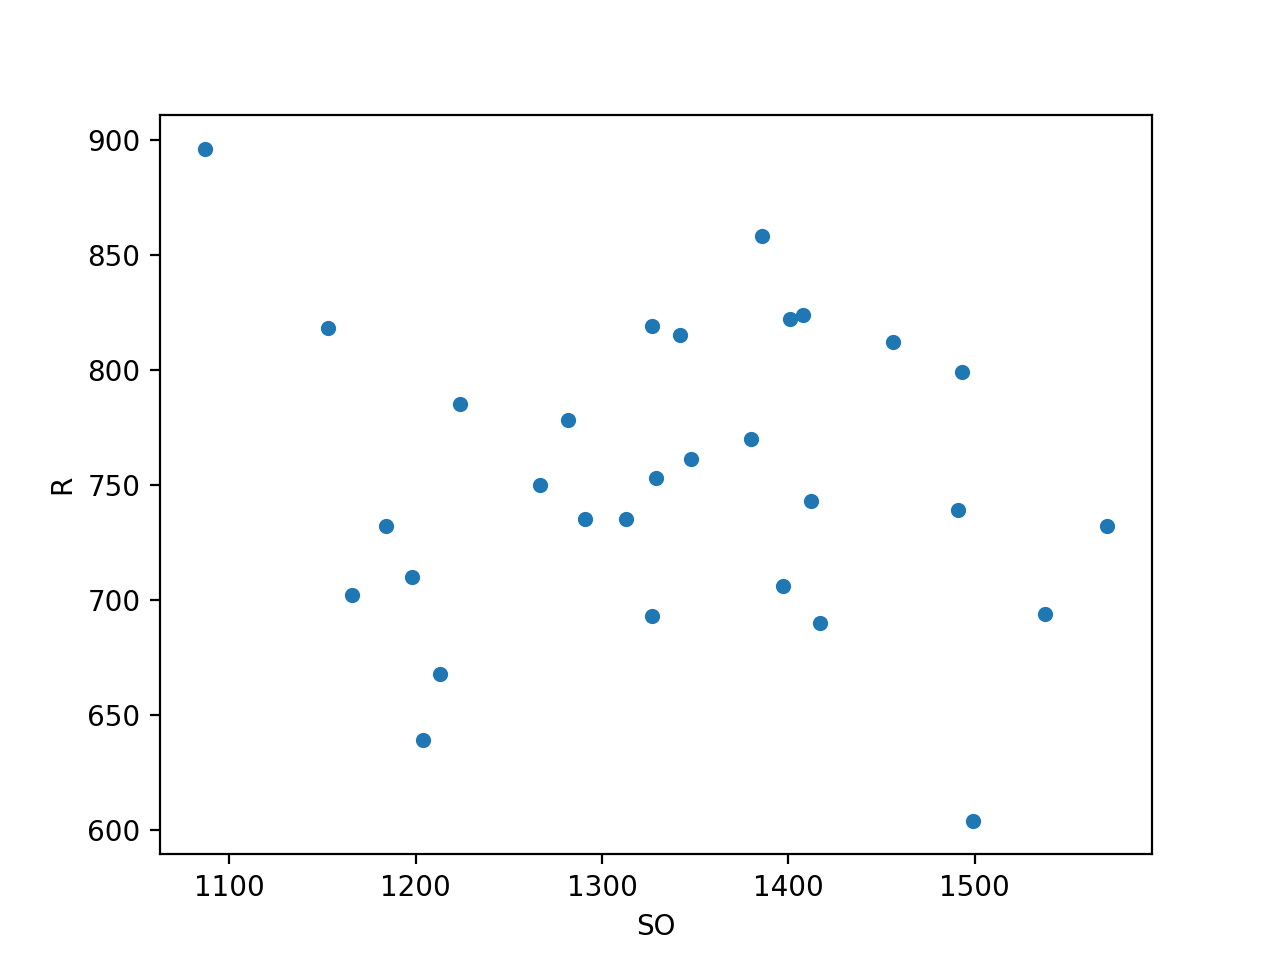

In [11]:
data_clean.plot.scatter('SO', 'R')

### Home Runs: Instant runs
Homers are immportant because they give the team runs instantly, and the defense can't do anything about it once the ball has been hit. Because they're physically impressive, they are an often cited statistic, but may not be as correlated to scoring as initially thought.

<IPython.core.display.Javascript object>


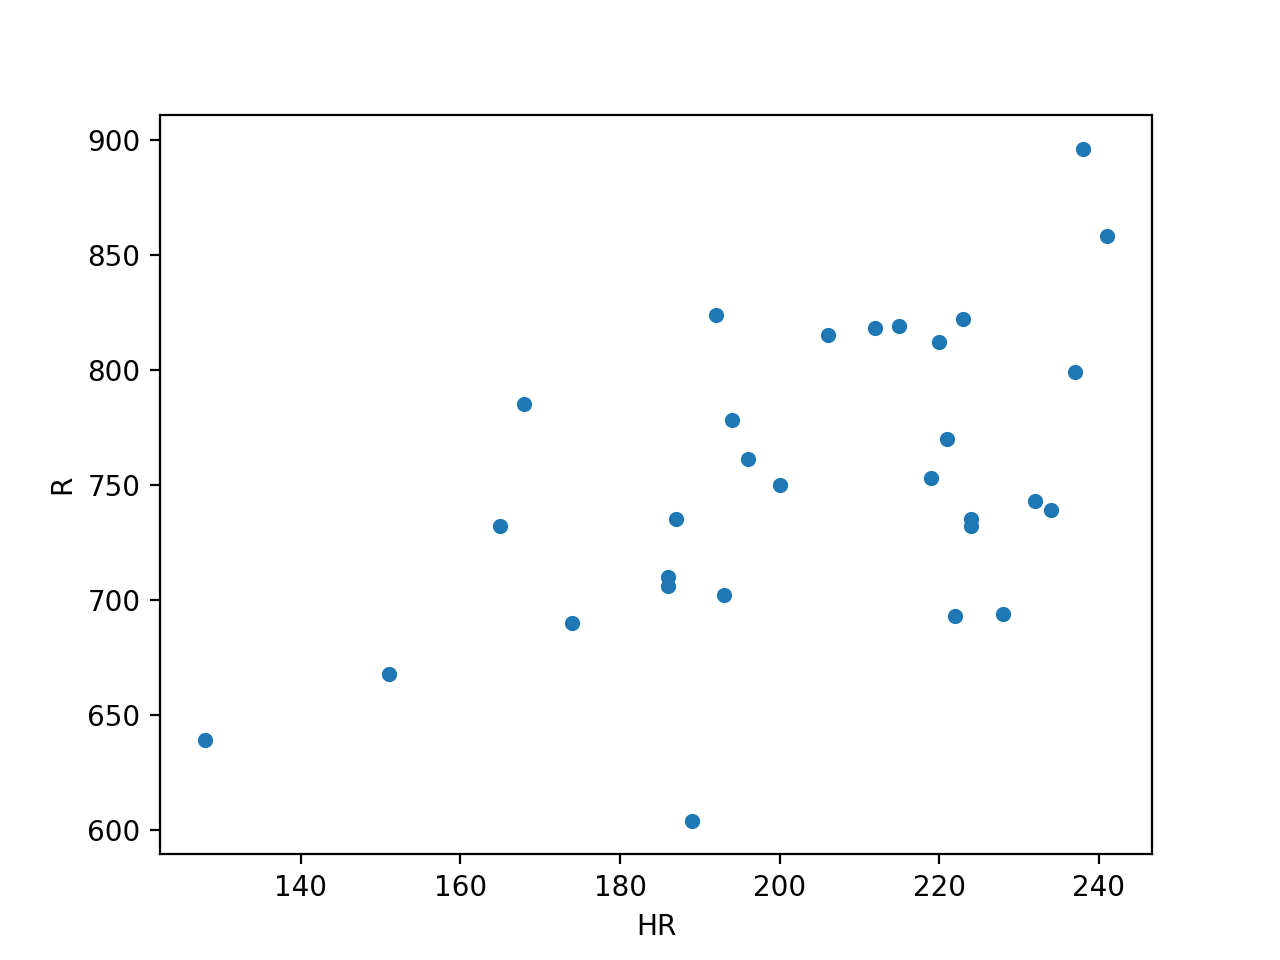

In [12]:
data_clean.plot.scatter('HR', 'R')

### Triples: Difficult and productive
Triples are hard hits to get. If a ball is hit hard, it often becomes a home run, but if it stays in the park, it's usually no more than a double because the size of parks is small enough that the defense can usually get to the ball in time to keep the batter/runner from advancing past second to third base

<IPython.core.display.Javascript object>


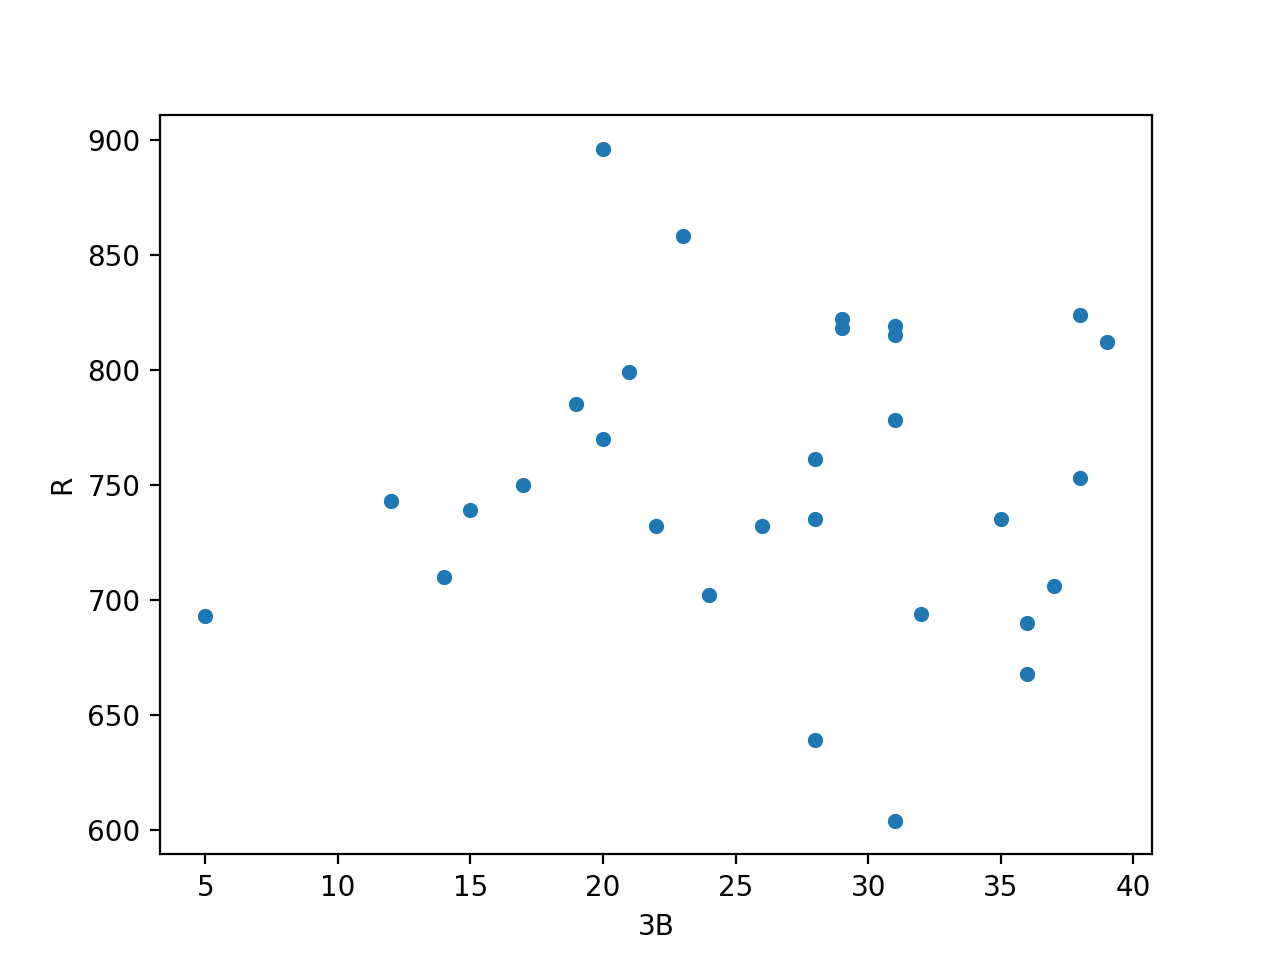

In [13]:
data_clean.plot.scatter('3B', 'R')

# Important Relevant Statistics

### On Base Percentage: Hitting and plate discipline

On base percentage is now more commonly used than batting average because getting hits is not the only way to get on base. You can also walk, and some players are very good at drawing walks and not swinging at pitches outside of the zone. Although a walk only moves runners a maximum of one base, it still puts a runner on base which gets a team that much closer to a run.

<IPython.core.display.Javascript object>


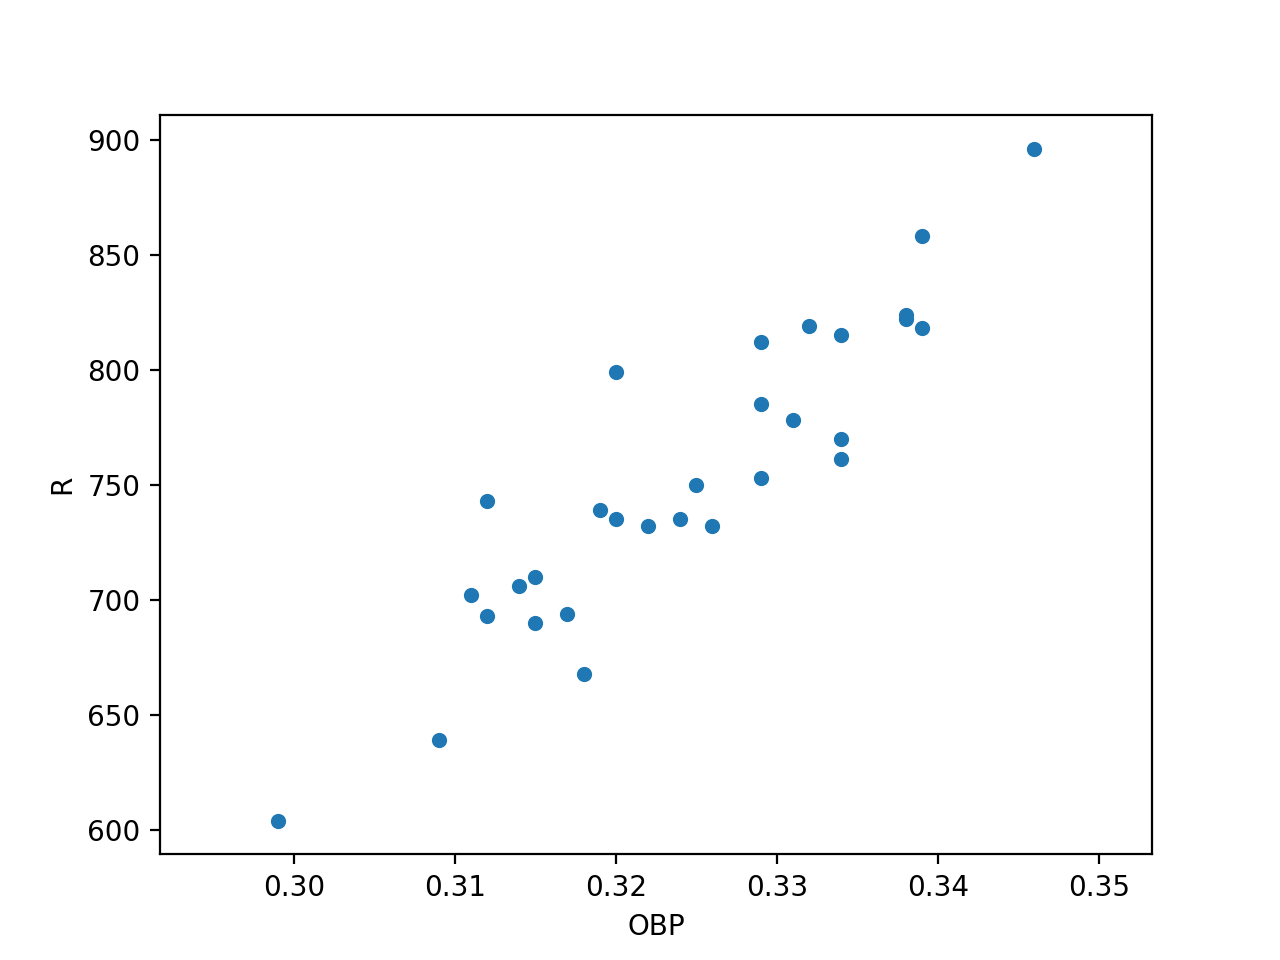

In [14]:
data_clean.plot.scatter('OBP', 'R')

### Slugging: How powerful a player's hits are

Batting average treats all hits as the same. However, a single is much less helpful than a triple. Obviously, the further a player makes it around the bases, the better the hit was, and the more likely he is to have driven in players already on base. In addition, being further around the basepaths makes it easier for upcoming batters to drive him in.

<IPython.core.display.Javascript object>


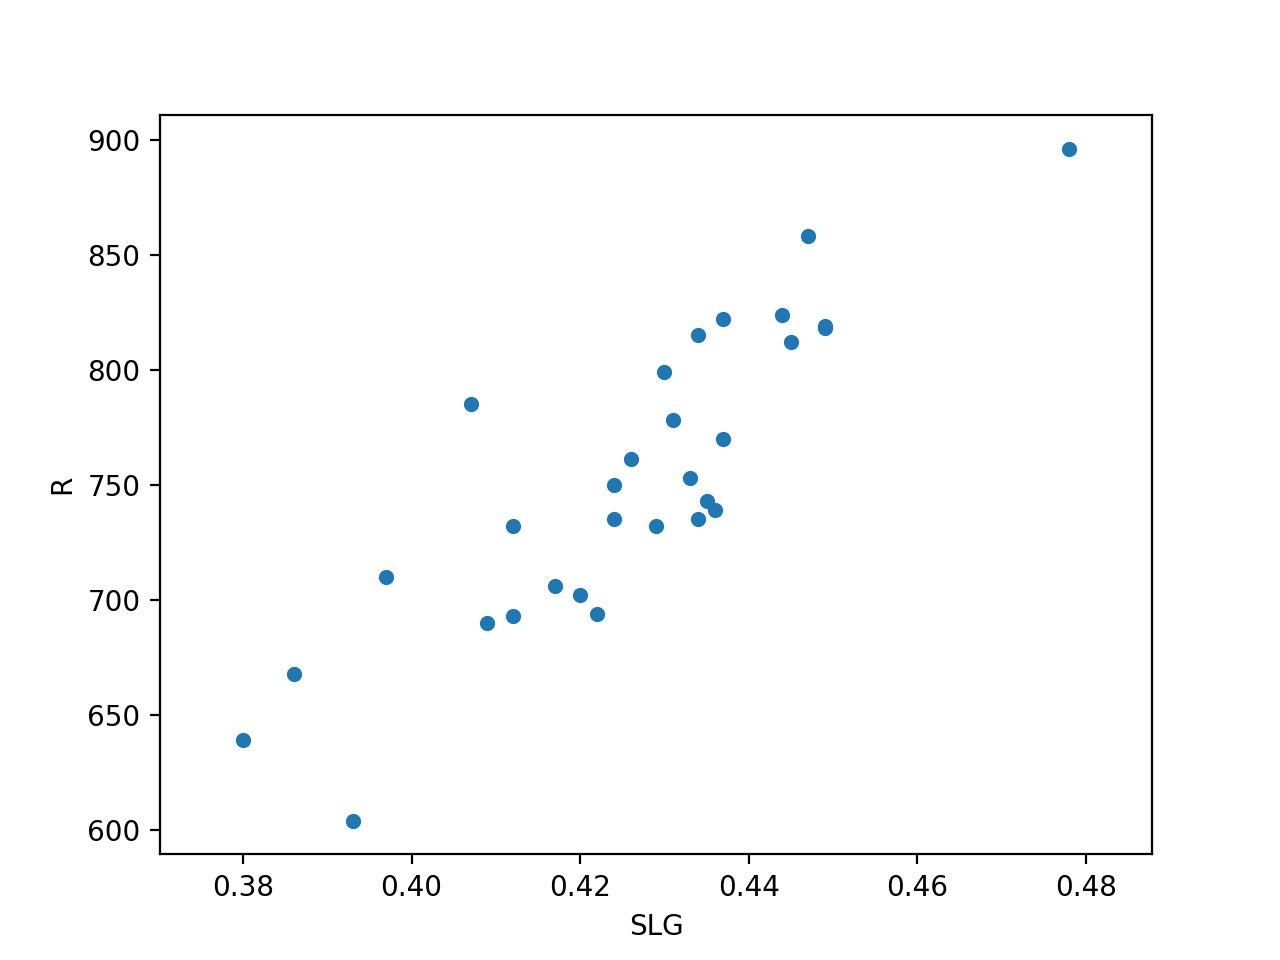

In [15]:
data_clean.plot.scatter('SLG', 'R')

# Machine Learning
Nearest Neighbor

We initially tried nearest neighbor to account for all the different approaches teams have. The model had an accuracy score of .167. This model did not perform well because we do not have enough data points, teams, to have an accurate model.  

In [34]:
target = data_clean.R
features = data_clean[['BA', 'HR', 'SO', 'BB', 'OBP', 'SLG']]
X = features.values
y = target.values
classifier = neighbors.KNeighborsClassifier()
classifier.fit(X, y)
classifier.score(X, y)

0.16666666666666666

We used a linear regression model to predict the number of runs scored based on batting average, homeruns, strikeouts, walks, On Base Percentage, and slugging percentage. We used cross validation to test our model. The model had a mean score of approximently .80 and a standard deviation of approximently .13. The model is fairly accurate but has a large standard deviation. We could improve the standard deviation by including more years, but other factors such as rule changes, changing team approaches, and physically changes in equipment mean the data is different year to year.  

In [35]:
classifier = linear_model.LinearRegression()
scores = cross_val_score(classifier, X, y, cv = 5)
print(scores)
print('mean', np.mean(scores))
print('standard deviation', np.std(scores))

[ 0.6995515   0.91531813  0.68013133  0.98084108  0.70349659]
mean 0.79586772562
standard deviation 0.126243967788
